<h1> Pesquisa em bancos de dados para astronomia</h1>

Primeiramente e necessario que o usuario tenha instalado no seu computador os modulos: numpy, pandas, astroquery, astropy, seaborn e matplotlib. O modulo Astrofunctions e um documento .py , criado pelo Rafael, que precisa estar alocado no mesmo diretorio que o codigo sera colocado.
Para instalacao dos modulos extras e necessario abrir o Terminal e digitar o comando pip install O_nome_do_modulo_de_interesse. O comando e o mesmo para usuarios do mac e para usuarios da distribuicao do anaconda no windows.  

In [5]:
import numpy as np
import pandas as pd
from astroquery.ned import Ned
from astroquery.simbad import Simbad
from astropy.table import Table,QTable
import astropy.units as u
from astropy import coordinates
import AstroFunctions as astro
import seaborn as sns
import matplotlib.pyplot as plt

Utilizando o modulo Pandas, o proximo passo e ler um arquivo csv alocado no endereco entre 
(""). Apos a leitura desse arquivo, o comando vvds[].values serve apara alocar em uma array 
os valores contidos na coluna intitulada "RA"

In [6]:
vvds = pd.read_csv("vvds-not.csv")
RA = vvds["RA"].values
DEC = vvds["DEC"].values

Para que seja possivel percorrer varias regioes relacionadas aos varios valores contidos na coluna que descreve as coordenadas e necessario realizar a pesquisa com o auxilio de um for que percorre todas as linhas das arrays e pesquisa regiao por regiao.

In [9]:
co = coordinates.SkyCoord(ra = RA[0],dec= DEC[0],unit=(u.deg,u.deg))
#Pesquisa no banco de dados NED
Ned_table = Ned.query_region(co, radius=0.1 * u.deg)
#Pesquisa no banco de dados SIMBAD
Simbad_table = Simbad.query_region(co, radius=0.1 * u.deg)


Com relação ao astroquery, ele possui um tempo limite de conexão com o servidor que e pequeno, por isso para uma pesquisa de muitos dados e necessário alterar o valor da variável timeout na pasta em que o modulo astroquery foi instalado e na respectiva pasta do banco de dados.

In [ ]:
l1 = []
l2 = []
for i in range(500):
    co = coordinates.SkyCoord(ra = RA[i],dec= DEC[i],unit=(u.deg,u.deg))
    #Pesquisa no banco de dados NED
    ned_table = Ned.query_region(co, radius=0.1* u.deg) 
    df = ned_table.to_pandas()
    l1.append(df)
    #Pesquisa no banco de dados SIMBAD
    simbad_table = Simbad.query_region(co, radius=0.1* u.deg) 
    df = simbad_table.to_pandas()
    l2.append(df)
    pass

In [19]:
len(l1)

640

In [20]:
for i in range(500,1000):
    co = coordinates.SkyCoord(ra = RA[i],dec= DEC[i],unit=(u.deg,u.deg))
    #Pesquisa no banco de dados NED
    ned_table = Ned.query_region(co, radius=0.1* u.deg) 
    df = ned_table.to_pandas()
    l1.append(df)
    #Pesquisa no banco de dados SIMBAD
    simbad_table = Simbad.query_region(co, radius=0.1* u.deg) 
    df = simbad_table.to_pandas()
    l2.append(df)
    pass

ConnectionError: HTTPConnectionPool(host='simbad.u-strasbg.fr', port=80): Read timed out.

In [7]:
ned = pd.concat(l1, axis = 0, ignore_index = True)    
simbad = pd.concat(l2, axis=0, ignore_index = True)

2548

In [ ]:
ned_table = Table.from_pandas(ned)
simbad_table = Table.from_pandas(simbad)

In [7]:
error = 0.00028
data = astro.match(Ned_table, Simbad_table,'RA','RA','DEC','DEC',error)
if len(data) != 0:
    data.add_column(1.5, name = 'random')
    for i in range(0, len(data)):
        data[i]['random'] = np.random.random()

ValueError: could not convert string to float: '02 26 43.08'

In [ ]:
Ned_table(4)

In [ ]:
Simbad_table(4)

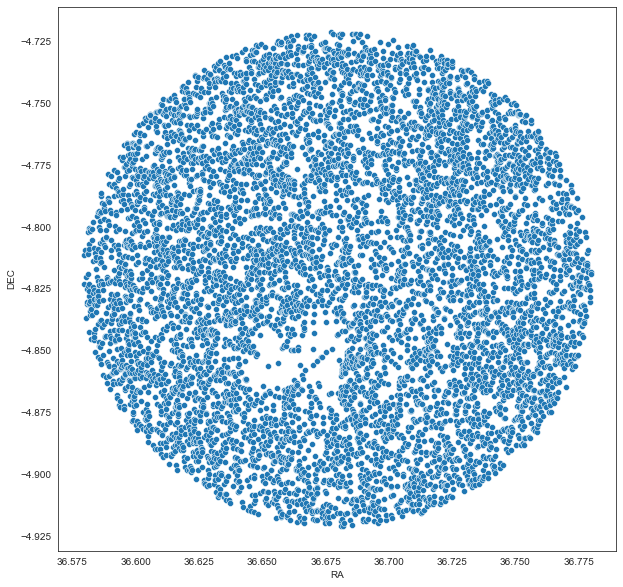

In [18]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
RA_DEC_Ned = Ned_table["RA","DEC"]
Ned_pandas = RA_DEC_Ned.to_pandas()
g = sns.scatterplot(x = "RA", y = "DEC", data= Ned_pandas)
plt.show()

In [13]:
type(Ned_table["RA"])

astropy.table.column.MaskedColumn

In [14]:
Ned_table["RA","DEC"]

RA,DEC
degrees,degrees
float64,float64
36.57948,-4.82312
36.57974,-4.81113
36.58008,-4.80914
36.58056,-4.82029
36.58058,-4.83664
36.58068,-4.83091
36.58095,-4.82493
36.58095,-4.83048
